$$\Large\textbf{RandomTree for Solar Features}$$

In [26]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

%matplotlib inline

In [27]:
#loading data set with features manually classificated
table = pd.read_csv('tables/test_classification.csv')

#need separate again, as in SVD?
sunspot_table = table.loc[table['sunspot'] == 1]
filament_table = table.loc[table['filament'] == 1]
plage_table = table.loc[table['plage'] == 1]
flare_table = table.loc[table['flare'] == 1]
#now we'll have table with all features manually labelled 
#(only one 1 and three 0 in one row for these columns: sunspot, filament, plage, flare)
frames = [sunspot_table, filament_table, plage_table, flare_table]
regions_detected_table = pd.concat(frames, ignore_index=False)

In [28]:
regions_detected_table.head()

,label,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,mean_intensity,min_intensity,max_intensity,...,relative_intensity,relative_min_intensity,relative_max_intensity,complexity,bbox_ratio,elongatedness,sunspot,filament,plage,flare
45,46,815,1129,805,1119,828,1141,7794.225248,4766,9190,...,0.851270,0.520533,1.003713,0.012376,0.956522,0.712871,1,0,0,0
46,47,841,881,830,870,855,895,7178.214000,3936,9138,...,0.783990,0.429882,0.998034,0.018000,1.000000,0.784000,1,0,0,0
51,52,845,1234,838,1225,855,1245,8322.142202,7278,9683,...,0.908928,0.794889,1.057558,0.077982,0.850000,0.449541,1,0,0,0
65,66,965,1215,956,1208,976,1225,7609.211538,4934,9140,...,0.831063,0.538882,0.998253,0.015385,0.850000,0.769231,1,0,0,0
80,81,1192,1208,1180,1195,1206,1222,7119.341463,4161,8929,...,0.777560,0.454456,0.975208,0.015009,0.962963,0.735460,1,0,0,0


In [29]:
#Create table only with properties for classification and manually classificated objects
train_table = regions_detected_table[['centroid-0', 'centroid-1', 'eccentricity', 'circularity', 
                           'elongation', 'bbox_ratio', 'elongatedness', 'solidity', 'complexity', 
                           'relative_intensity', 'relative_min_intensity', 'relative_max_intensity',
                           'sunspot', 'filament', 'plage', 'flare']].copy()

In [30]:
train_table.head()

,centroid-0,centroid-1,eccentricity,circularity,elongation,bbox_ratio,elongatedness,solidity,complexity,relative_intensity,relative_min_intensity,relative_max_intensity,sunspot,filament,plage,flare
45,815,1129,0.367855,0.880313,0.070117,0.956522,0.712871,0.957346,0.012376,0.851270,0.520533,1.003713,1,0,0,0
46,841,881,0.659011,0.922547,0.247867,1.000000,0.784000,0.978474,0.018000,0.783990,0.429882,0.998034,1,0,0,0
51,845,1234,0.827849,0.783980,0.439049,0.850000,0.449541,0.935622,0.077982,0.908928,0.794889,1.057558,1,0,0,0
65,965,1215,0.575060,0.961790,0.181889,0.850000,0.769231,0.977444,0.015385,0.831063,0.538882,0.998253,1,0,0,0
80,1192,1208,0.627887,0.926776,0.221696,0.962963,0.735460,0.977982,0.015009,0.777560,0.454456,0.975208,1,0,0,0


In [31]:
data = np.array(train_table)
O = data[:, 2:12].astype(float)
print(O)
V = data[:, 12:16].astype(float)
print(V)

[[0.36785474 0.88031311 0.07011673 ... 0.85126969 0.52053298 1.00371341]
 [0.65901113 0.92254738 0.24786682 ... 0.78399017 0.42988204 0.99803408]
 [0.82784932 0.78397965 0.43904946 ... 0.90892772 0.7948886  1.05755789]
 ...
 [0.66820573 0.42196065 0.25602345 ... 1.35735088 1.12751239 1.79311957]
 [0.75291737 0.19187416 0.34188494 ... 1.27477856 1.09058615 1.86201739]
 [0.92731217 0.34151251 0.62571116 ... 1.42962078 1.14723754 1.93484154]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [32]:
#O_scaled = StandardScaler().fit_transform(O)
#spliting data set into test_data for learning and data for classification
O_train, O_test, V_train, V_test = train_test_split(O, V, test_size=0.5, train_size=0.5) 

In [47]:
clf = RandomForestClassifier(n_estimators=200, class_weight=None)
clf.fit(O_train, V_train)
V_pred = clf.predict(O_test)

In [48]:
print(len(V_pred[3]))
V_pred

4


array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [49]:
V_test.shape

(6236, 4)

In [50]:
accuracy_score(V_test, V_pred)

0.9866901860166774

In [51]:
print(classification_report(V_pred, V_test))

             precision    recall  f1-score   support

          0       0.85      0.95      0.90       269
          1       0.99      0.97      0.98      1672
          2       1.00      1.00      1.00      4277
          3       0.36      0.60      0.45        15

avg / total       0.99      0.99      0.99      6233



In [53]:
V_prob =  clf.predict_proba(O_test)

In [60]:
V_prob[0][:,1], V_test[0]

(array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 1., 0.]))

In [62]:
len(V_test[:,0])

6236

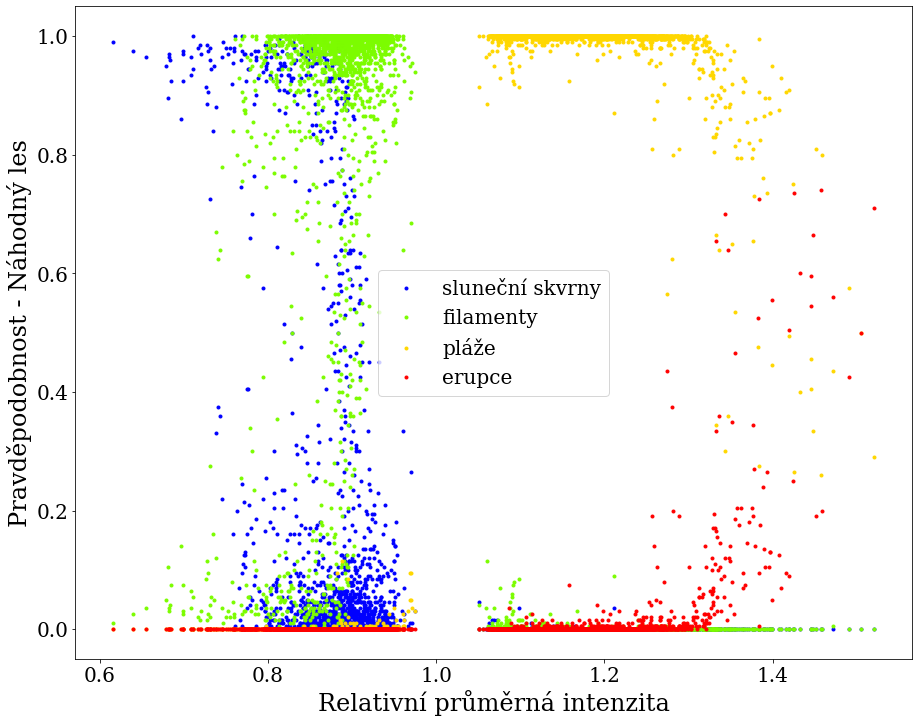

In [77]:
#plot predicted probalities of each class in each row and corresponding intensity
#intensity normalised to the range <0,1>
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams['font.size']=20
plt.rcParams["font.weight"] = "normal"
plt.rcParams['font.family'] = ['Serif']

plt.plot(O_test[:,7], V_prob[0][:,1], 'bo', markersize=3, label='sluneční skvrny')
plt.plot(O_test[:,7], V_prob[1][:,1], 'o', color='lawngreen', markersize=3, label='filamenty')
plt.plot(O_test[:,7], V_prob[2][:,1], 'o', color='gold', markersize=3, label='pláže')
plt.plot(O_test[:,7], V_prob[3][:,1], 'ro', markersize=3, label='erupce')
plt.xlabel('Relativní průměrná intenzita', fontsize=24)
plt.ylabel('Pravděpodobnost - Náhodný les', fontsize=24)
plt.legend(fontsize=20)

$$\Large\textbf{Graphs for RandomTree for Solar Features}$$

In [66]:
V_prob_all =  clf.predict_proba(O)

In [71]:
first_spot = V_prob_all[0][:,1]
second_fil = V_prob_all[1][:,1]
third_plag = V_prob_all[2][:,1]
fourth_flar = V_prob_all[3][:,1]

In [72]:
probability_prediction = np.column_stack((first_spot,second_fil, third_plag, fourth_flar))

In [74]:
probability_prediction.shape

(12471, 4)

In [75]:
#create table from predicted probabilities
predicted = pd.DataFrame(probability_prediction, columns=['sunspot_pred', 'filament_pred', 'plage_pred', 'flare_pred'])
#reset index of rows, so it can be connected to data
regions_detected_table.reset_index(drop=True, inplace=True)
regions_detected_table.head()
#connect predicted probabilities with table of regions
result = pd.concat([regions_detected_table, predicted], axis=1, ignore_index=False)

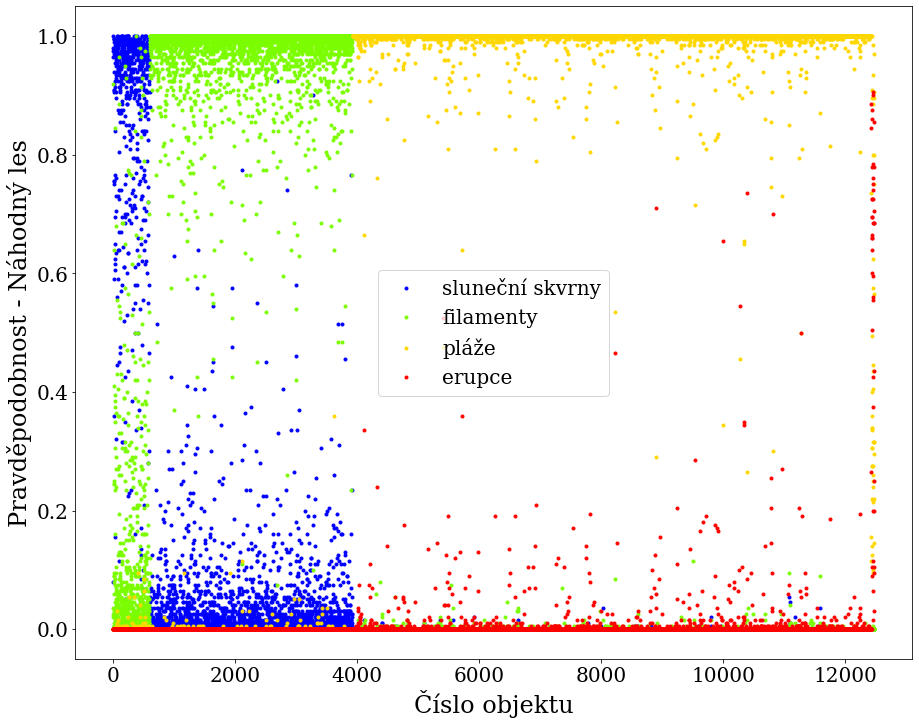

In [79]:
#plot estimated probabilities for each class
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams['font.size']=20
plt.rcParams["font.weight"] = "normal"
plt.rcParams['font.family'] = ['Serif']

plt.plot(result['sunspot_pred'].index, result['sunspot_pred'].values, 'bo', markersize=3, label='sluneční skvrny')
plt.plot(result['filament_pred'].index, result['filament_pred'].values, 'o', color='lawngreen', 
                                          markersize=3, label='filamenty')
plt.plot(result['plage_pred'].index, result['plage_pred'].values, 'o', color='gold', markersize=3, label='pláže')
plt.plot(result['flare_pred'].index, result['flare_pred'].values, 'ro', markersize=3, label='erupce')
plt.xlabel('Číslo objektu', fontsize=24)
plt.ylabel('Pravděpodobnost - Náhodný les', fontsize=24)
plt.legend(fontsize=20)